# ANOVA 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns
sns.set_style("whitegrid")
import scipy.stats as stats

Проведем однофакторный дисперсионный анализ ANOVA для тестирования одного фактора и нескольких групп. Содзадим еще одну группу. Допустим трем группам показывали разные модели сайта.

In [25]:
df = pd.read_csv(r'C:\Users\Lily_B\Documents\аналитика на python\ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [41]:
df['group'] = np.where((df.user_id % 3 == 0), 'treatment_2', df.group)
df['landing_page'] = np.where((df.user_id % 3 == 0), 'new_page_2', df.landing_page)

In [42]:
df['group'].value_counts()

treatment_2    117797
control         88473
treatment       88208
Name: group, dtype: int64

In [43]:
df['landing_page'].value_counts()

old_page      98266
new_page_2    98111
new_page      98101
Name: landing_page, dtype: int64

In [44]:
df['user_id'].nunique()

290584

In [45]:
df[df["user_id"].duplicated()]

,user_id,timestamp,group,landing_page,converted
2656,698120,2017-01-15 17:13:42.602796,control,old_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0
7500,899953,2017-01-07 03:06:54.068237,control,new_page,0
8036,790934,2017-01-19 08:32:20.329057,treatment,new_page,0
10218,633793,2017-01-17 00:16:00.746561,treatment,old_page,0
...,...,...,...,...,...
294308,905197,2017-01-03 06:56:47.488231,treatment,new_page,0
294309,787083,2017-01-17 00:15:20.950723,treatment_2,new_page_2,0
294328,641570,2017-01-09 21:59:27.695711,control,old_page,0
294331,689637,2017-01-13 11:34:28.339532,treatment_2,new_page_2,0


In [50]:
df_mistake = df[(df["group"]=="treatment")&((df["landing_page"]=="old_page")|(df["landing_page"]=="new_page_2"))
                |(df["group"]=="control")&((df["landing_page"]=="new_page")|(df["landing_page"]=="new_page_2"))
               |(df["group"]=="treatment_2")&((df["landing_page"]=="old_page")|(df["landing_page"]=="new_page"))]
n_mistake = len(df_mistake)

In [51]:
n_mistake

22023

In [52]:
print(f'Процентное соотношение ошибочных строк к общему количеству:{round(n_mistake/len(df)*100, 2)}%')

Процентное соотношение ошибочных строк к общему количеству:7.48%


In [103]:
df2 = df[(df["group"]=="treatment")&(df["landing_page"]=="new_page")
        |(df["group"]=="control")&(df["landing_page"]=="old_page")
        |(df["group"]=="treatment_2")&(df["landing_page"]=="new_page_2")]
df2

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,treatment_2,new_page_2,0
2,661590,2017-01-11 16:55:06.154213,treatment_2,new_page_2,0
4,864975,2017-01-21 01:52:26.210827,treatment_2,new_page_2,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
...,...,...,...,...,...
294472,822004,2017-01-04 03:36:46.071379,treatment,new_page,0
294473,751197,2017-01-03 22:28:38.630509,treatment_2,new_page_2,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0


In [104]:
dou = df2[df2["user_id"].duplicated()]
dou.rename(columns = {'user_id' : 'user_id_dou', 'timestamp' : 'timestamp_dou'
                     , 'group' : 'group_dou', 'landing_page' : 'landing_page_dou'
                     , 'converted' : 'converted_dou'}, inplace = True)
dou

C:\Users\Lily_B\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,user_id_dou,timestamp_dou,group_dou,landing_page_dou,converted_dou
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0
11215,839784,2017-01-08 20:21:17.123650,treatment_2,new_page_2,0
11428,926754,2017-01-18 01:13:55.001878,treatment_2,new_page_2,0
12858,793494,2017-01-20 08:48:41.498741,treatment_2,new_page_2,0
15112,781656,2017-01-10 15:19:55.527776,treatment_2,new_page_2,1
...,...,...,...,...,...
293996,942612,2017-01-08 13:52:28.182648,treatment_2,new_page_2,0
294200,928506,2017-01-13 21:32:10.491309,treatment_2,new_page_2,0
294309,787083,2017-01-17 00:15:20.950723,treatment_2,new_page_2,0
294331,689637,2017-01-13 11:34:28.339532,treatment_2,new_page_2,0


In [72]:
import sqlite3

In [73]:
con = sqlite3.connect('db')
cur = con.cursor()

In [74]:
def select(sql):
  return pd.read_sql(sql,con)

In [105]:
df2.to_sql('trans',con,index=False,if_exists='replace')
dou.to_sql('krek',con,index=False,if_exists='replace')

In [108]:
sql = ''' select * 
    from trans t
    left join krek k on k.user_id_dou = t.user_id
    where k.user_id_dou is null'''

In [109]:
select(sql)

,user_id,timestamp,group,landing_page,converted,user_id_dou,timestamp_dou,group_dou,landing_page_dou,converted_dou
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,None,None,None,None,None
1,804228,2017-01-12 08:01:45.159739,treatment_2,new_page_2,0,None,None,None,None,None
2,661590,2017-01-11 16:55:06.154213,treatment_2,new_page_2,0,None,None,None,None,None
3,864975,2017-01-21 01:52:26.210827,treatment_2,new_page_2,1,None,None,None,None,None
4,936923,2017-01-10 15:20:49.083499,control,old_page,0,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
269852,822004,2017-01-04 03:36:46.071379,treatment,new_page,0,None,None,None,None,None
269853,751197,2017-01-03 22:28:38.630509,treatment_2,new_page_2,0,None,None,None,None,None
269854,945152,2017-01-12 00:51:57.078372,control,old_page,0,None,None,None,None,None
269855,734608,2017-01-22 11:45:03.439544,control,old_page,0,None,None,None,None,None


In [110]:
select(sql)[select(sql)["user_id"].duplicated()]

,user_id,timestamp,group,landing_page,converted,user_id_dou,timestamp_dou,group_dou,landing_page_dou,converted_dou


In [111]:
df2 = select(sql).drop(['user_id_dou', 'timestamp_dou', 'group_dou', 'landing_page_dou', 'converted_dou'], axis=1)
df2

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,treatment_2,new_page_2,0
2,661590,2017-01-11 16:55:06.154213,treatment_2,new_page_2,0
3,864975,2017-01-21 01:52:26.210827,treatment_2,new_page_2,1
4,936923,2017-01-10 15:20:49.083499,control,old_page,0
...,...,...,...,...,...
269852,822004,2017-01-04 03:36:46.071379,treatment,new_page,0
269853,751197,2017-01-03 22:28:38.630509,treatment_2,new_page_2,0
269854,945152,2017-01-12 00:51:57.078372,control,old_page,0
269855,734608,2017-01-22 11:45:03.439544,control,old_page,0


In [113]:
df_counts = pd.DataFrame({"Control_count": df2[df2.group=="control"].converted.value_counts(),
              "Treatment_count": df2[df2.group=="treatment"].converted.value_counts(),
              "Treatment_2_count": df2[df2.group=="treatment_2"].converted.value_counts(),
              "Control_ratio": df2[df2.group=="control"].converted.value_counts()/ len(df2[df2.group=="control"]),
              "Trement_ratio": df2[df2.group=="treatment"].converted.value_counts() / len(df2[df2.group=="treatment"]),
              "Trement_2_ratio": df2[df2.group=="treatment_2"].converted.value_counts() / len(df2[df2.group=="treatment_2"])})
df_counts

,Control_count,Treatment_count,Treatment_2_count,Control_ratio,Trement_ratio,Trement_2_ratio
0,76804,76640,84052,0.87968,0.880586,0.879987
1,10505,10393,11463,0.12032,0.119414,0.120013


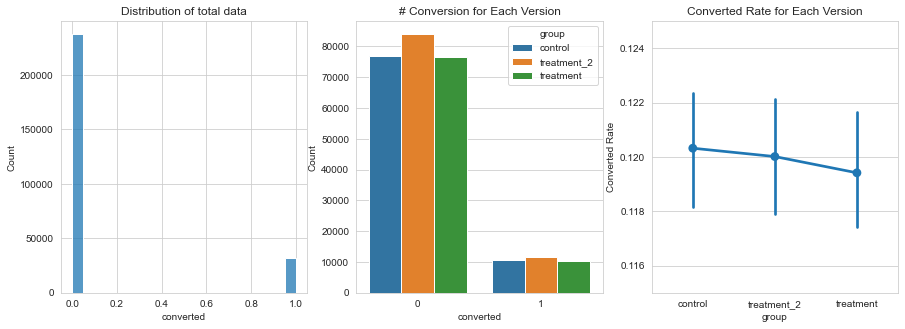

In [114]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
fig, axes = plt.subplots(1,3)

sns.histplot(x="converted", data=df2, ax=axes[0])
axes[0].set_title("Distribution of total data")

sns.countplot(x="converted", data=df2, hue="group", ax=axes[1])
axes[1].set(title="# Conversion for Each Version", ylabel="Count")

sns.pointplot(x="group", y="converted",kind="point", data=df2, ax=axes[2])
axes[2].set_ylim([0.115, 0.125])
axes[2].set(title="Converted Rate for Each Version",ylabel="Converted Rate")

plt.show()

In [116]:
table = df_counts.iloc[:,0:3].to_numpy()
table

array([[76804, 76640, 84052],
       [10505, 10393, 11463]], dtype=int64)

In [119]:
A = df2[df2["group"]=="control"].converted
B = df2[df2["group"]=="treatment"].converted
C = df2[df2["group"]=="treatment_2"].converted

Если общее значение p из таблицы ANOVA меньше некоторого уровня значимости, то у нас есть достаточно доказательств, чтобы сказать, что по крайней мере одно из средних значений групп отличается от других. Этот метод не говорит нам, какие группы отличаются друг от друга. Мы должны провести апостериорный тест.


In [121]:
# Perform one-way ANOVA
stats.f_oneway(A, B, C)

F_onewayResult(statistic=0.17535727010444763, pvalue=0.839157257030761)

Поскольку p-значение из таблицы ANOVA составляет 0.83, что больше 0.05, у нас есть достаточно доказательств, чтобы сказать, что средние значения для каждой группы равны.

Апостериорные тесты для множественных парных сравнений.

Существует три метода тестирования: тест Бонферрони, тест Тьюки и тест Шеффе. Бонферрони обладает большей мощностью, когда количество сравнений невелико, тогда как Тьюки более эффективен при тестировании большого количества средних.

In [123]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [124]:
tukey = pairwise_tukeyhsd(endog=df2['converted'],
                          groups=df2['group'],
                          alpha=0.05)

print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
  control   treatment  -0.0009 0.8107 -0.0046 0.0027  False
  control treatment_2  -0.0003    0.9 -0.0039 0.0033  False
treatment treatment_2   0.0006    0.9  -0.003 0.0042  False
-----------------------------------------------------------


Статистически значимой разницы между группами control и treatment, control и treatment_2, treatment и treatment_2 нет.